In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

# 1. Importing and Cleansing the Data

The file (apple.2011.csv) has 3 columns: date, price, and percent change.  The information you are really interested in is the percent change.  This value is the percent change in the price from the previous date to the date on the corresponding row.

Let's import the date form the CSV as a dataframe

In [3]:
apple_2011 = pd.read_csv('apple.2011.csv')

Let's set the column names as desired and convert the percent change column to numeric and show the first few rows.

In [4]:
apple_2011.columns = ['date', 'last_price','pct_change']
apple_2011[['pct_change']] = apple_2011[['pct_change']].convert_objects(convert_numeric=True)
apple_2011.head()

/Users/malarcon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,date,last_price,pct_change
0,1/3/2011,329.57,NaN
1,1/4/2011,331.29,0.005219
2,1/5/2011,334.00,0.008180
3,1/6/2011,333.73,-0.000808
4,1/7/2011,336.12,0.007161


# 2. Pct Change Gaussian Random Number Generator

Use the percent change values to create a Gaussian random number generator.  This generator will create Gaussian-distributed randoms to use as hypothetical percent changes on the day to day price of Apple stock.

First, let's plot a histogram of the pct_change variable:

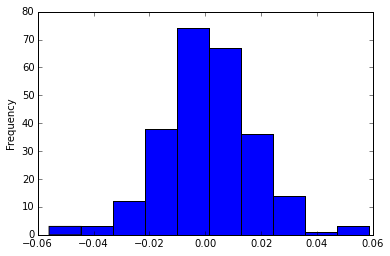

In [5]:
apple_2011['pct_change'].plot.hist()

In [6]:
def gaussian_daily_change ( mean, sd, days ):
    return(numpy.random.normal(mean,sd,days))

# 3. Generate 20 random numbers

With that generator, create 20 random numbers.  With these randoms, you can find a potential price change over 20 days.

In [7]:
gaussian_change = gaussian_daily_change(apple_2011['pct_change'].mean()
                                        ,apple_2011['pct_change'].std()
                                        ,20)

In [8]:
gaussian_change

array([  1.96501061e-02,   2.56303611e-02,   2.15932688e-02,
        -1.77402552e-02,  -3.47733147e-02,  -3.25135340e-02,
         4.34992484e-02,   2.95971842e-02,  -2.66507187e-02,
        -5.48239047e-03,   1.90551771e-02,  -2.22174778e-02,
         9.05368616e-03,  -1.23497668e-03,  -6.70011046e-03,
         1.07894339e-03,  -2.59311264e-02,   8.24567211e-03,
         1.53885810e-05,   5.01061558e-03])

# 4. Estimate the change in 20 Days

Start with the price from the last row and the random numbers to determine a hypothetical price after 20 days.  To do this, take that last price, apply a percent change and get a new price.  Then take that new price, and apply the next percent change.  Do this for the 20 randoms, and get a final price.

In [9]:
last_price = float(apple_2011['last_price'].tail(1))

In [10]:
from operator import mul
est_price_20D = last_price * reduce(mul, gaussian_change+1, 1)

In [11]:
est_price_20D

406.83281022458095

The above stores the final price after 20 days (you can discard the intermediate price values).


# 5. Run the experiment a large number of times

Repeat steps 3-5 a very large number of times.  Something like 10000.  Each run will yield a different result.

Let's code the above a little better.

In [12]:
def cummulative_pct_change(mean,sd,days):
    daily_pct_change = gaussian_daily_change(mean, sd, days)
    total_pct_change = reduce(mul, daily_pct_change+1, 1)
    return (total_pct_change)

In [13]:
def repeat_price_est_n_times(price, mean, sd, days, n):
    prices = [1]*n
    return (map(lambda x: float(cummulative_pct_change(mean, sd, days)*price), prices))

In [14]:
prices=repeat_price_est_n_times(last_price
                         , apple_2011['pct_change'].mean()
                         , apple_2011['pct_change'].std()
                         , 20
                         , 100000)

In [15]:
prices = np.array(prices)

# 6. Calculate the 1st Percentile

Take all of the stored prices (10000 or so), sort them, and find the 1% lowest percentile.  This value is the final result, and represents the VaR with 99% confidence.  This means that the price will be above this result after 20 days with a confidence level of 99%.

In [16]:
np.percentile(prices, 1)

346.3367807682796

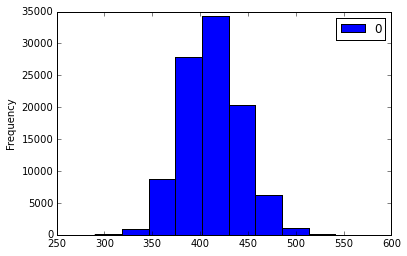

In [17]:
pd.DataFrame(prices).plot.hist()

**Therefore, we can say that the Apple stock price will be above $346 after 20 days with a confidence level of 99% **